## This notebook uses geopandas to play with the NYC neighborhoods shapefile available at https://www1.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page. It also uses a very small subset of the crimes dataset to explore mapping crimes to neighborhoods.

In [1]:
import geopandas
from shapely.geometry import Point
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
pd.options.display.max_rows = 10

In [2]:
# Load our shapefile using geopandas
neighborhoods = geopandas.read_file('nynta.shp')
display(neighborhoods)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.228028,"POLYGON ((990897.9000244141 169268.1207885742,..."
1,4,Queens,081,QN52,East Flushing,2.945438e+07,25843.364923,"POLYGON ((1041061.948242188 215429.4609985352,..."
2,4,Queens,081,QN48,Auburndale,3.416422e+07,32446.878753,"POLYGON ((1046392.971191406 210169.7536010742,..."
3,4,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904732,"POLYGON ((1038593.459228516 221913.3550415039,..."
4,4,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.712112,"POLYGON ((1022728.275024414 217530.8082275391,..."
...,...,...,...,...,...,...,...,...
190,1,Manhattan,061,MN36,Washington Heights South,2.310048e+07,22095.210900,"POLYGON ((1003231.182189941 248025.8281860352,..."
191,2,Bronx,005,BX26,Highbridge,1.645722e+07,18507.423648,"POLYGON ((1007134.753601074 247182.4255981445,..."
192,2,Bronx,005,BX63,West Concourse,1.938664e+07,28550.756378,"POLYGON ((1008620.929199219 246511.2341918945,..."
193,2,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.199039e+07,67346.087026,"(POLYGON ((1017313.476196289 237489.665222168,..."


In [3]:
# Find the boundary of each neighborhood
bounds = neighborhoods.bounds
display(bounds)

,minx,miny,maxx,maxy
0,9.822082e+05,162478.111633,9.917731e+05,174107.999390
1,1.033886e+06,211169.669617,1.041164e+06,216737.932434
2,1.040414e+06,208318.344421,1.046393e+06,220023.060791
3,1.032285e+06,215407.440186,1.042341e+06,223347.718994
4,1.018490e+06,214963.454590,1.024560e+06,220477.852600
...,...,...,...,...
190,9.980431e+05,241841.070435,1.003231e+06,249664.240417
191,1.002623e+06,241003.934814,1.007441e+06,247284.540405
192,1.002772e+06,235572.969604,1.008621e+06,247186.574219
193,1.016247e+06,232396.226196,1.029605e+06,241334.257385


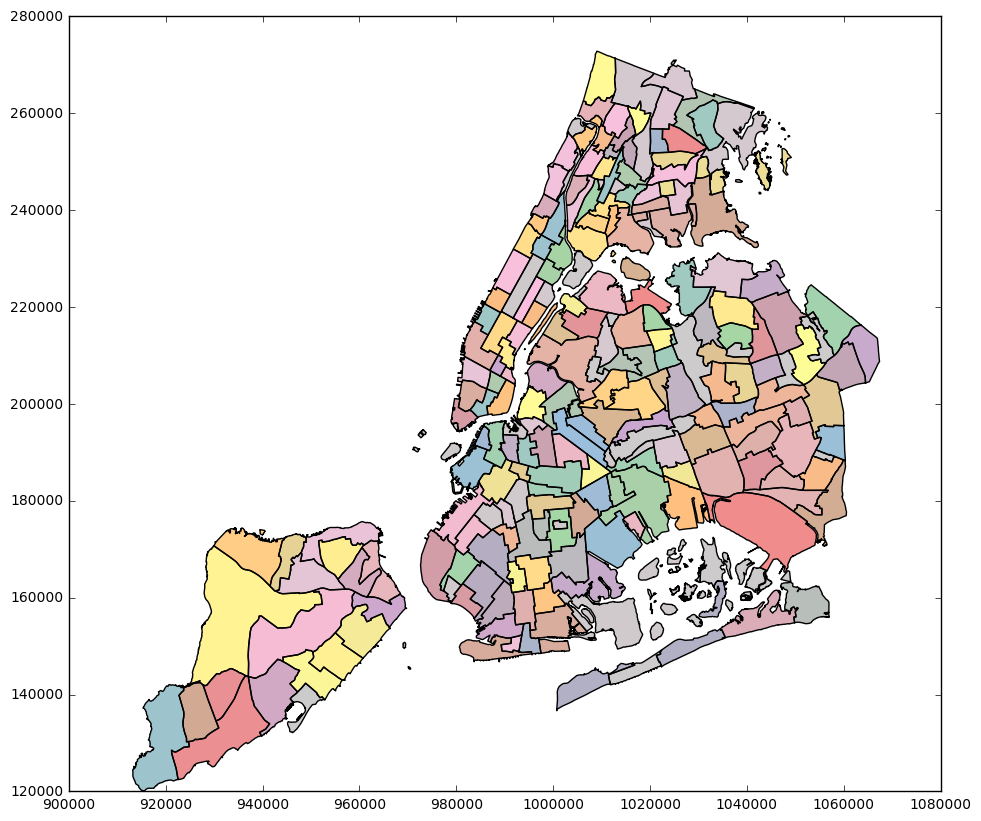

In [4]:
# Draw a map of all the neighborhoods
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
neighborhoods.plot(column='NTAName', legend=False, ax=ax)
plt.show()

In [5]:
# Load our small sample crime dataset
crimes = pd.read_csv('../data/crime_data_sample.csv')
crimes = crimes[0:100] # Cut down sample even farther for demo purposes
display(crimes)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,471989363,12/31/2015,20:30:00,12/31/2015,20:35:00,12/31/2015,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,...,120,INSIDE,RESIDENCE-HOUSE,NaN,NaN,960506.0,175491.0,40.648335,-74.085567,"(40.648335283, -74.085566761)"
96,411809607,12/31/2015,20:30:00,12/31/2015,20:35:00,12/31/2015,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,120,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,RICHMOND TERRACE,960040.0,174187.0,40.644755,-74.087241,"(40.644754824, -74.087241385)"
97,249234887,12/31/2015,20:30:00,NaN,NaN,12/31/2015,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,121,INSIDE,CHECK CASHING BUSINESS,NaN,NaN,938881.0,167697.0,40.626858,-74.163443,"(40.626858064, -74.163443377)"
98,428109409,12/31/2015,20:30:00,12/31/2015,20:40:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,114,NaN,STREET,NaN,NaN,1004058.0,215491.0,40.758136,-73.928502,"(40.758135542, -73.928502477)"


In [6]:
# Map crimes to neighborhoods
def find_neighborhood(x_coord, y_coord):
    '''
    Takes a pair of X and Y coordinates (using the NAD_1983_StatePlane_New_York_Long_Island coordinate system)
    and returns the corresponding New York City neighborhood.
    '''
    point = Point(x_coord, y_coord)
    if any(neighborhoods.geometry.contains(Point(x_coord, y_coord))):
        return neighborhoods.loc[neighborhoods.geometry.contains(Point(x_coord, y_coord)), 'NTAName'].values[0]
    return np.nan

crimes['Neighborhood'] = crimes.apply(lambda row: find_neighborhood(row['X_COORD_CD'], row['Y_COORD_CD']), axis=1)
display(crimes)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,Neighborhood
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",East Concourse-Concourse Village
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",South Jamaica
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",East Harlem North
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",Rosedale
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",Gramercy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,471989363,12/31/2015,20:30:00,12/31/2015,20:35:00,12/31/2015,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,...,INSIDE,RESIDENCE-HOUSE,NaN,NaN,960506.0,175491.0,40.648335,-74.085567,"(40.648335283, -74.085566761)",West New Brighton-New Brighton-St. George
96,411809607,12/31/2015,20:30:00,12/31/2015,20:35:00,12/31/2015,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,RICHMOND TERRACE,960040.0,174187.0,40.644755,-74.087241,"(40.644754824, -74.087241385)",West New Brighton-New Brighton-St. George
97,249234887,12/31/2015,20:30:00,NaN,NaN,12/31/2015,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,INSIDE,CHECK CASHING BUSINESS,NaN,NaN,938881.0,167697.0,40.626858,-74.163443,"(40.626858064, -74.163443377)",Mariner's Harbor-Arlington-Port Ivory-Granitev...
98,428109409,12/31/2015,20:30:00,12/31/2015,20:40:00,12/31/2015,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,NaN,STREET,NaN,NaN,1004058.0,215491.0,40.758136,-73.928502,"(40.758135542, -73.928502477)",Astoria


In [7]:
# Which records have missing neighborhood info in our sample dataset?
# (Answer: Records without any location information)
display(crimes[pd.isnull(crimes['Neighborhood'])])

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,Neighborhood
21,340513307,04/06/2015,12:00:00,04/10/2015,18:00:00,12/21/2015,104,RAPE,155.0,RAPE 2,...,INSIDE,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,280765300,12/31/2015,22:20:00,12/31/2015,22:47:00,12/31/2015,233,SEX CRIMES,681.0,"CHILD, ENDANGERING WELFARE",...,INSIDE,BAR/NIGHT CLUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
